In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(0, os.path.abspath('../../..'))
from g4l.estimators import BIC
from g4l.estimators import SMC
import g4l.display
from g4l.estimators import Prune
from g4l.models import ContextTree
from g4l.models import integrity
from g4l.data import Sample

## Comparing the ocurrence of optimal tree among estimated champion trees

In [2]:
results_folder = os.path.abspath('../../example2/results')
methods = ['SeqROCTM', 'prune', 'smc']
models = ['model1', 'model2']
sizes = [5000, 10000, 20000]
correct_model = '000 1 10 100'

def get_results(method, model_name, size):
    file = '%s/%s/%s_%s.csv' % (results_folder, method, model_name, size)
    df = pd.read_csv(file)    
    df.tree = df.tree.astype(str).map(lambda t: ' '.join(sorted(t.split())))
    return df

def compare_optimal_tree_occurrence(model_name):
    df = pd.DataFrame(columns= ['model', 'sample_size'] + methods)
    for size in sizes:
        arr = [(get_results(method, model_name, size).tree==correct_model).astype(int).sum() for method in methods]
        df.loc[len(df)] = ([model_name, size] + arr)
    return df.sort_values(['model', 'sample_size'])

def plot_model(model):
    plt.figure(figsize=(10,6))
    for m in methods:
        plt.plot(model.sample_size, model[m], label=m)
    plt.xticks([5000, 10000, 20000])
    plt.ylabel('Optimal trees found among champion trees (%)')
    plt.xlabel('Resamples size')
    plt.legend()
    plt.show()

### Model 1

In [3]:
model1 = compare_optimal_tree_occurrence('model1')
model1

,model,sample_size,SeqROCTM,prune,smc
0,model1,5000,37,72,37
1,model1,10000,49,80,55
2,model1,20000,82,92,89


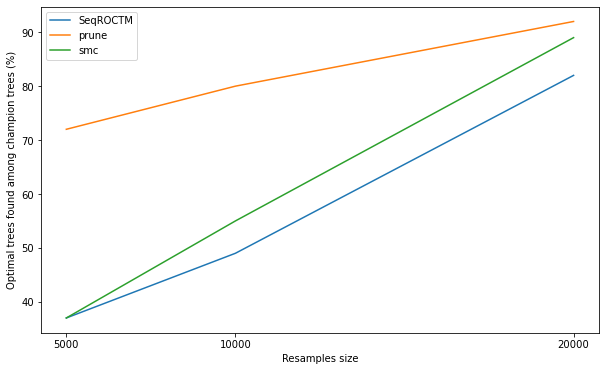

In [4]:
plot_model(model1)

### Model 2

In [32]:
model2 = compare_optimal_tree_occurrence('model2')
model2

,model,sample_size,SeqROCTM,prune,smc
0,model2,5000,67,89,53
1,model2,10000,87,94,42
2,model2,20000,99,100,58


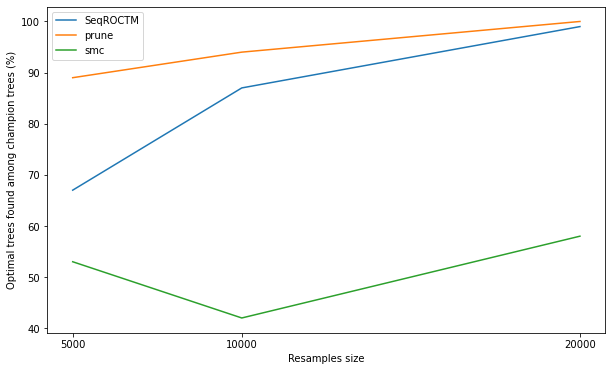

In [33]:
plot_model(model2)

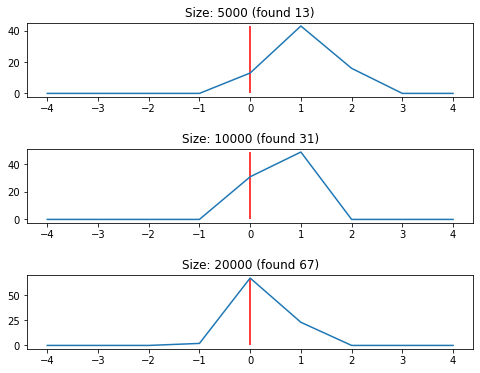

Metodo novo


In [78]:
x = [-4, -3, -2, -1, 0, 1, 2, 3, 4]
plt.figure(figsize=(8, 6))
plt.subplots_adjust(hspace=0.7)
for i, sz in enumerate([5000, 10000, 20000]):
    df = get_results('prune', 'model1', sz)
    plt.subplot(3, 1, i+1)
    y = [df[(df.tree==correct_model) & (df.tree_idx==df.opt_idx-xx)].count().tree for xx in x]
    vl = df[(df.tree==correct_model) & (df.tree_idx==df.opt_idx)].count().tree
    plt.title('Size: %s (found %s)' % (sz, vl))
    plt.plot(x, y)    
    plt.vlines([0], 0, max(y), color='r')
plt.show()
print("Metodo novo")

In [80]:
df = get_results('prune', 'model1', 5000)
df[(df.tree==correct_model) & df.opt==1]

,model_name,sample_idx,method,tree_idx,tree,num_contexts,likelihood,opt,opt_idx
295,model1,14,prune,17,000 1 10 100,4,-1665.566807,1,17
672,model1,33,prune,17,000 1 10 100,4,-1698.666165,1,17
772,model1,38,prune,17,000 1 10 100,4,-1663.607572,1,17
792,model1,39,prune,17,000 1 10 100,4,-1686.333661,1,17
812,model1,40,prune,17,000 1 10 100,4,-1716.154127,1,17
832,model1,41,prune,17,000 1 10 100,4,-1668.484949,1,17
911,model1,45,prune,17,000 1 10 100,4,-1647.435399,1,17
971,model1,48,prune,17,000 1 10 100,4,-1702.494014,1,17
1366,model1,68,prune,17,000 1 10 100,4,-1659.612748,1,17
1466,model1,73,prune,17,000 1 10 100,4,-1698.144029,1,17
